## 6.4 Supervised Machine Learning - Regression

### This script contains the following:¶

### 1. Import Libraries and Data

### 2. Data cleaning

### 3. Data prep for regression analysis

### 4. Regression Analysis¶

### 1. Import libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Ensure the graphs are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Create path

path = r'C:\Users\Frederick\Documents\17-12-2023 World University Rankings'

In [4]:
# Import data for time ranking

the = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'times.csv'), index_col = False)

In [5]:
# Import data for shanghai ranking

shanghai = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'shanghai.csv'), index_col = False)

In [6]:
# Import data for cwur ranking

cwur = pd.read_csv(os.path.join(path, '02. Data', 'Prepared Data', 'cwur.csv'), index_col = False)

### 2. Data cleaning

### For this exercise, I will look at linear regression on the three ranking bodies. Specifically, how the total scores (y value) will change given the change in one of the strongest correlated variable. From previous exercise, I know that:

### Times ranking - the total scores are blank for universities ranking above 200, therefore these will be removed. 

### Shanghai ranking - the total scores are blank for universities ranking above 100, therefore these will be removed. 

### CWUR ranking - the total scores are complete but some of the variables have missing values, and the universities ranking is up to 1000 for later years.  I will include all of them first for the regression analysis and see the result. 

In [7]:
the.shape

(2603, 14)

In [8]:
# Checking for missing values in times ranking dataframe

the.isnull().sum() # All missing values in total score will be removed. 

Unnamed: 0                   0
world_rank                   0
university_name              0
country                      0
teaching                     0
international                9
research                     0
citations                    0
income                     218
total_score               1402
num_students                59
student_staff_ratio         59
international_students      67
year                         0
dtype: int64

In [9]:
# Creating a subset in without missing total scores in times dataframe 

the_sub = the[the['total_score'].isnull() == False]

In [10]:
# Checking output of the times subset

the_sub.shape # Count is correct after removing missing total scores

(1201, 14)

In [11]:
the_sub.dtypes # From previous exercise, the strongest variable is research variable (0.90 coefficient)

Unnamed: 0                  int64
world_rank                 object
university_name            object
country                    object
teaching                  float64
international             float64
research                  float64
citations                 float64
income                    float64
total_score               float64
num_students              float64
student_staff_ratio       float64
international_students     object
year                        int64
dtype: object

In [12]:
# Renaming column name

the_sub.rename(columns = {'total_score' : 'scores'}, inplace = True)

C:\Users\Frederick\AppData\Local\Temp\ipykernel_26768\210613555.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  the_sub.rename(columns = {'total_score' : 'scores'}, inplace = True)


In [13]:
# Checking for missing values in times ranking subset

the_sub.isnull().sum() # Some missing values in income and other variables, but not in total scores and research. 

Unnamed: 0                  0
world_rank                  0
university_name             0
country                     0
teaching                    0
international               9
research                    0
citations                   0
income                    140
scores                      0
num_students               19
student_staff_ratio        19
international_students     20
year                        0
dtype: int64

In [14]:
shanghai.shape

(4896, 13)

In [15]:
# Checking for missing values in shanghai ranking dataframe

shanghai.isnull().sum() # All missing values in total score will be removed. 

Unnamed: 0             0
world_rank             0
university_name        0
country             1490
national_rank          0
total_score         3795
alumni                 0
award                  1
cited_research         1
articles              21
science_citation       1
capita                 1
year                   0
dtype: int64

In [16]:
# Creating a subset in without missing total scores in shanghai dataframe 

shanghai_sub = shanghai[shanghai['total_score'].isnull() == False]

In [17]:
# Checking output of the times subset

shanghai_sub.shape # Count is correct after removing missing total scores

(1101, 13)

In [18]:
shanghai_sub.dtypes # From previous exercise, the strongest variable is papers published (i.e. articles variable) (0.93 coefficient)

Unnamed: 0            int64
world_rank           object
university_name      object
country              object
national_rank        object
total_score         float64
alumni              float64
award               float64
cited_research      float64
articles            float64
science_citation    float64
capita              float64
year                  int64
dtype: object

In [19]:
# Renaming column name

shanghai_sub.rename(columns = {'total_score' : 'scores', 'articles' : 'papers published'}, inplace = True)

C:\Users\Frederick\AppData\Local\Temp\ipykernel_26768\3047124042.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shanghai_sub.rename(columns = {'total_score' : 'scores', 'articles' : 'papers published'}, inplace = True)


In [20]:
# Checking for missing values in shanghai ranking subset

shanghai_sub.isnull().sum() # No more missing values in the subset!

Unnamed: 0          0
world_rank          0
university_name     0
country             0
national_rank       0
scores              0
alumni              0
award               0
cited_research      0
papers published    0
science_citation    0
capita              0
year                0
dtype: int64

In [21]:
cwur.shape

(2200, 15)

In [22]:
# Checking for missing values in cwur ranking dataframe

cwur.isnull().sum() # No missing value in score. Missing value in broad_impact but this variable won't be used.  

Unnamed: 0                0
world_rank                0
university_name           0
country                   0
national_rank             0
quality_of_education      0
alumni_employment         0
quality_of_faculty        0
publications              0
influence                 0
citations                 0
broad_impact            200
patents                   0
score                     0
year                      0
dtype: int64

In [23]:
cwur.dtypes # From previous exercise, the strongest variable is staff award - quality of education variable (-0.69 coefficient)

Unnamed: 0                int64
world_rank                int64
university_name          object
country                  object
national_rank             int64
quality_of_education      int64
alumni_employment         int64
quality_of_faculty        int64
publications              int64
influence                 int64
citations                 int64
broad_impact            float64
patents                   int64
score                   float64
year                      int64
dtype: object

In [24]:
# Renaming column names

cwur.rename(columns = {'score' : 'scores', 'quality_of_education' : 'staff award'}, inplace = True)

In [25]:
# Checking duplicates in times subset

the_dups = the_sub.duplicated()

In [26]:
the_dups.shape # No duplicates

(1201,)

In [27]:
# Checking duplicates in shanghai subset

shanghai_dups = shanghai_sub.duplicated()

In [28]:
shanghai_dups.shape # No cuplicates

(1101,)

In [29]:
# Checking duplicates in cwur subset

cwur_dups = cwur.duplicated()

In [30]:
cwur_dups.shape # No duplicates

(2200,)

C:\Users\Frederick\AppData\Local\Temp\ipykernel_26768\3377674724.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(the_sub['scores'], bins=25) # Shows extreme values for times ranking subset
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN befor

<Axes: xlabel='scores', ylabel='Density'>

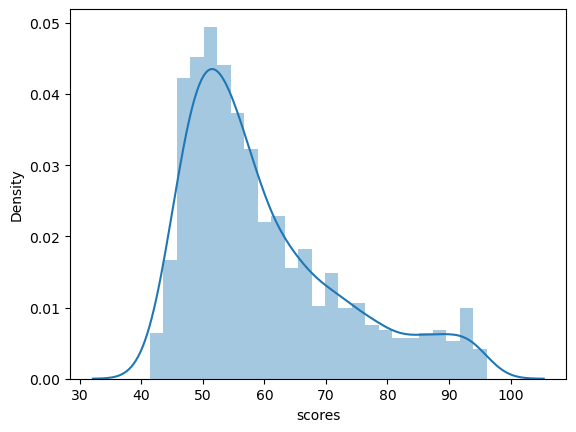

In [31]:
sns.distplot(the_sub['scores'], bins=25) # Shows extreme values for times ranking subset

# score range is fixed between 0 to 100, no extreme values. 

C:\Users\Frederick\AppData\Local\Temp\ipykernel_26768\3274985665.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(shanghai_sub['scores'], bins=25) # Shows extreme values for shanghai ranking subset
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to N

<Axes: xlabel='scores', ylabel='Density'>

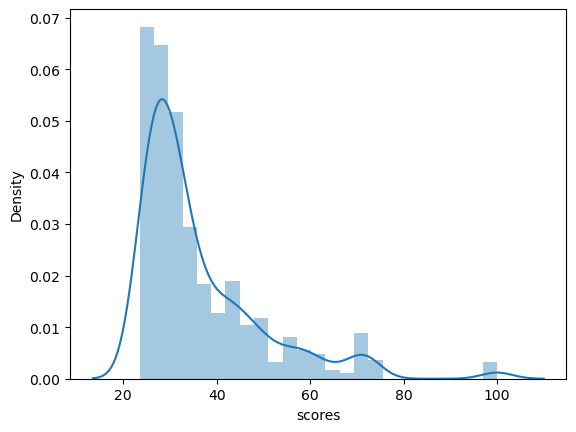

In [32]:
sns.distplot(shanghai_sub['scores'], bins=25) # Shows extreme values for shanghai ranking subset

# score range is fixed between 0 to 100. However, distribution of scores show no value between 75 to 90s, and then data point at 100. Keep it in at the moment, and might try removing it later.   

C:\Users\Frederick\AppData\Local\Temp\ipykernel_26768\305621952.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cwur['scores'], bins=25) # Shows extreme values for cwur ranking dataframe
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before 

<Axes: xlabel='scores', ylabel='Density'>

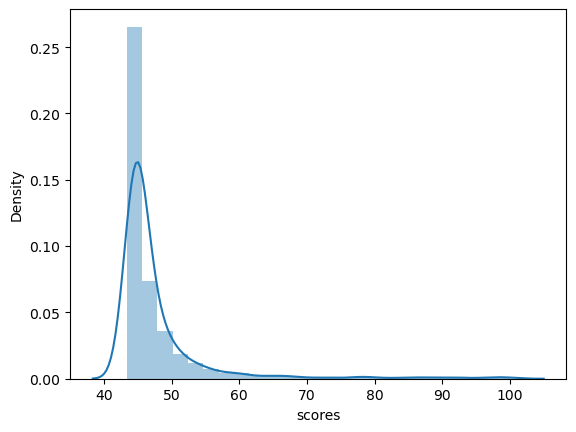

In [33]:
sns.distplot(cwur['scores'], bins=25) # Shows extreme values for cwur ranking dataframe

# score range is fixed between 0 to 100. However, distribution of scores is skewed to the right, meaning that most of the scores gathered on the left (between 40 top 50)!

In [34]:
cwur.describe() # Mean and median total scores both between 40 to 50, even at 75% still between 40 to 50. But Max is 100, indicating there are few higher scores (extreme value?)

,Unnamed: 0,world_rank,national_rank,staff award,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,scores,year
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2000.000000,2200.000000,2200.000000,2200.000000
mean,1099.500000,459.590909,40.278182,275.100455,357.116818,178.888182,459.908636,459.797727,413.417273,496.699500,433.346364,47.798395,2014.318182
std,635.229617,304.320363,51.740870,121.935100,186.779252,64.050885,303.760352,303.331822,264.366549,286.919755,273.996525,7.760806,0.762130
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,43.360000,2012.000000
25%,549.750000,175.750000,6.000000,175.750000,175.750000,175.750000,175.750000,175.750000,161.000000,250.500000,170.750000,44.460000,2014.000000
50%,1099.500000,450.500000,21.000000,355.000000,450.500000,210.000000,450.500000,450.500000,406.000000,496.000000,426.000000,45.100000,2014.000000
75%,1649.250000,725.250000,49.000000,367.000000,478.000000,218.000000,725.000000,725.250000,645.000000,741.000000,714.250000,47.545000,2015.000000
max,2199.000000,1000.000000,229.000000,367.000000,567.000000,218.000000,1000.000000,991.000000,812.000000,1000.000000,871.000000,100.000000,2015.000000


### 3. Data prep for regression analysis 

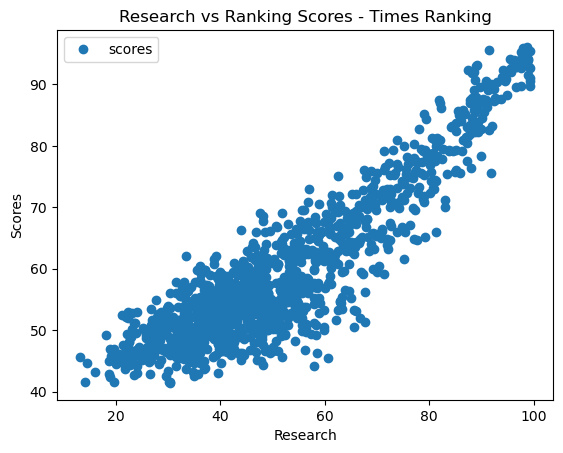

In [35]:
# Create a scatterplot for times subset with research being the chosen variable and the total scores

the_sub.plot(x = 'research', y='scores',style='o') 
plt.title('Research vs Ranking Scores - Times Ranking')  
plt.xlabel('Research')  
plt.ylabel('Scores')  
plt.show()

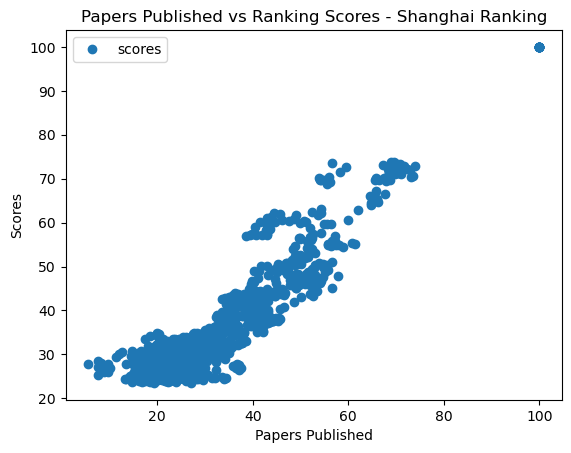

In [36]:
# Create a scatterplot for shanghai subset with papers published being the chosen variable and the total scores

shanghai_sub.plot(x = 'papers published', y='scores',style='o') 
plt.title('Papers Published vs Ranking Scores - Shanghai Ranking')  
plt.xlabel('Papers Published')  
plt.ylabel('Scores')  
plt.show()

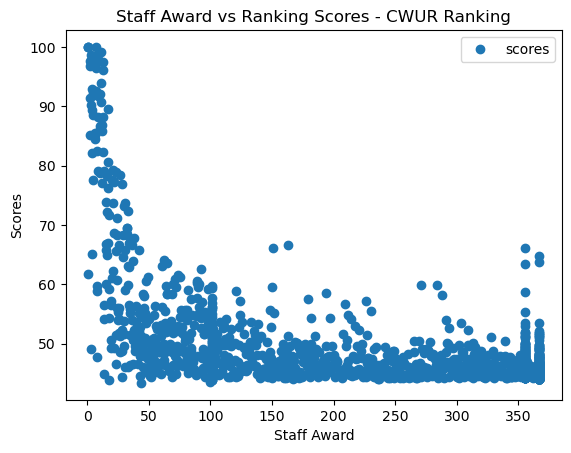

In [37]:
# Create a scatterplot for cwur subset with staff award being the chosen variable and the total scores

cwur.plot(x = 'staff award', y='scores',style='o') 
plt.title('Staff Award vs Ranking Scores - CWUR Ranking')  
plt.xlabel('Staff Award')  
plt.ylabel('Scores')  
plt.show()

### Hypothesis 1. The higher the score on the research indicator for Times ranking (covering research volume, income and reputation), the higher the total ranking score

### Hypothesis 2. The higher the reserach output scores (i.e. more papers published in Nature and Science), the higher the ranking score. 

### Hypothesis 3. The higher the ranking on faculty/staff award indicator (i.e. number of faculty members who have won prestigious awards), the higher the ranking score. 

### 4. Regression analysis 

In [71]:
# Reshape the variables into NumPy arrays for times subset

X1 = the_sub['research'].values.reshape(-1,1)
y1 = the_sub['scores'].values.reshape(-1,1)

In [72]:
# Split data into a training set and a test set for times subset

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [73]:
# Create a regression object

regression = LinearRegression()  

In [74]:
# Fiting the regression object onto the training set for times subset

regression.fit(X1_train, y1_train)

LinearRegression()

In [75]:
# Predict the values of y1 using X1 - times subset

y1_predicted = regression.predict(X1_test)

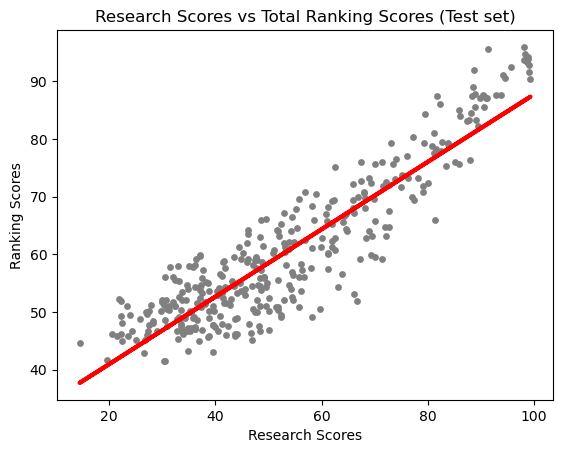

In [76]:
# Create a plot that shows the regression line from the model on the test - times subset

plot_test1 = plt
plot_test1.scatter(X1_test, y1_test, color='gray', s = 15)
plot_test1.plot(X1_test, y1_predicted, color='red', linewidth =3)
plot_test1.title('Research Scores vs Total Ranking Scores (Test set)')
plot_test1.xlabel('Research Scores')
plot_test1.ylabel('Ranking Scores')
plot_test1.show()

In [77]:
# Create objects that contain the model summary statistic - times subset

rmse_the = mean_squared_error(y1_test, y1_predicted) 
r2_the = r2_score(y1_test, y1_predicted) 

In [78]:
# Print the model summary statistics - times subset

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_the)
print('R2 score: ', r2_the)

Slope: [[0.58602454]]
Mean squared error:  29.27233578150617
R2 score:  0.8277507929248966


In [79]:
# Create a dataframe comparing the actual and predicted values of y1 - times ranking subset

data1 = pd.DataFrame({'Actual': y1_test.flatten(), 'Predicted': y1_predicted.flatten()})
data1.head(30)

,Actual,Predicted
0,46.2,55.076698
1,49.9,49.978285
2,67.0,67.031599
3,61.1,63.339644
4,77.1,73.712279
5,54.7,60.761136
6,47.2,49.919682
7,46.6,43.473412
8,57.7,53.670239
9,69.5,74.474111


In [80]:
# Reshape the variables into NumPy arrays for shanghai subset

X2 = shanghai_sub['papers published'].values.reshape(-1,1)
y2 = shanghai_sub['scores'].values.reshape(-1,1)

In [81]:
# Split data into a training set and a test set for shanghai subset

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=0)

In [82]:
# Fiting the regression object onto the training set for shanghai subset

regression.fit(X2_train, y2_train)

LinearRegression()

In [83]:
# Predict the values of y2 using X2 - shanghai subset

y2_predicted = regression.predict(X2_test)

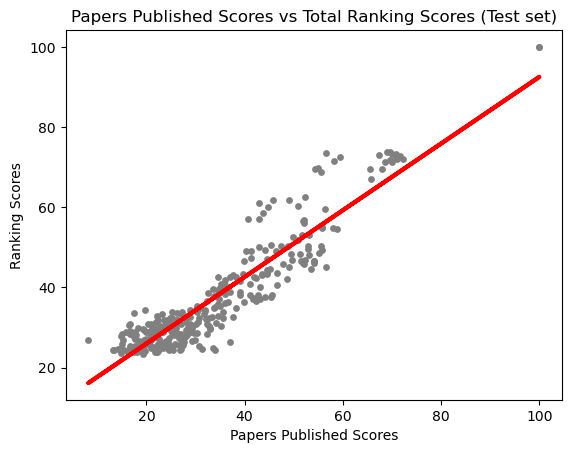

In [84]:
# Create a plot that shows the regression line from the model on the test - shanghai subset

plot_test2 = plt
plot_test2.scatter(X2_test, y2_test, color='gray', s = 15)
plot_test2.plot(X2_test, y2_predicted, color='red', linewidth =3)
plot_test2.title('Papers Published Scores vs Total Ranking Scores (Test set)')
plot_test2.xlabel('Papers Published Scores')
plot_test2.ylabel('Ranking Scores')
plot_test2.show()

In [85]:
# Create objects that contain the model summary statistic - shanghai subset

rmse_shanghai = mean_squared_error(y2_test, y2_predicted) 
r2_shanghai = r2_score(y2_test, y2_predicted) 

In [86]:
# Print the model summary statistics - shanghai subset

print('Slope:',regression.coef_)
print('Mean squared error: ', rmse_shanghai)
print('R2 score: ', r2_shanghai)

Slope: [[0.83164813]]
Mean squared error:  26.696270591065367
R2 score:  0.8606044877511749


In [87]:
# Create a dataframe comparing the actual and predicted values of y2 - shanghai ranking subset

data2 = pd.DataFrame({'Actual': y2_test.flatten(), 'Predicted': y2_predicted.flatten()})
data2.head(30)

,Actual,Predicted
0,28.9,25.918089
1,50.4,49.952720
2,26.9,16.187806
3,25.9,21.926178
4,34.5,35.981032
5,73.1,65.338211
6,29.5,30.824813
7,24.1,25.751760
8,35.4,38.392811
9,27.2,25.918089


In [88]:
# Reshape the variables into NumPy arrays for cwur subset

X3 = cwur['staff award'].values.reshape(-1,1)
y3 = cwur['scores'].values.reshape(-1,1)

In [89]:
# Split data into a training set and a test set for cwur subset

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=0)

In [90]:
# Fiting the regression object onto the training set for cwur subset

regression.fit(X3_train, y3_train)

LinearRegression()

In [91]:
# Predict the values of y3 using X3 - cwur subset

y3_predicted = regression.predict(X3_test)

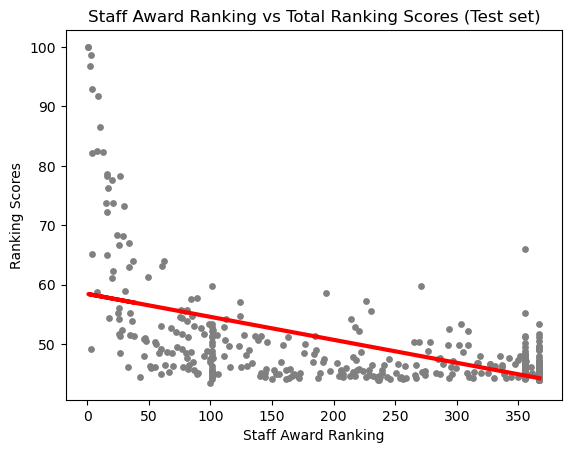

In [53]:
# Create a plot that shows the regression line from the model on the test - cwur subset 
plot_test3 = plt
plot_test3.scatter(X3_test, y3_test, color='gray', s = 15)
plot_test3.plot(X3_test, y3_predicted, color='red', linewidth =3)
plot_test3.title('Staff Award Ranking vs Total Ranking Scores (Test set)')
plot_test3.xlabel('Staff Award Ranking')
plot_test3.ylabel('Ranking Scores')
plot_test3.show()

In [92]:
# Create objects that contain the model summary statistic - cwur subset

rmse_cwur = mean_squared_error(y3_test, y3_predicted) 
r2_cwur = r2_score(y3_test, y3_predicted) 

In [93]:
# Print the model summary statistics - cwur subset

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse_cwur)
print('R2 score: ', r2_cwur)

Slope: [[-0.03865305]]
Mean squared error:  36.27374429188503
R2 score:  0.3634203685147095


In [94]:
# Create a dataframe comparing the actual and predicted values of y3 - cwur ranking subset

data3 = pd.DataFrame({'Actual': y3_test.flatten(), 'Predicted': y3_predicted.flatten()})
data3.head(30)

,Actual,Predicted
0,49.70,44.266369
1,48.23,53.465795
2,51.46,57.099182
3,54.19,54.084244
4,45.01,44.730205
5,47.59,55.321141
6,45.74,44.730205
7,47.96,46.121715
8,46.58,45.812491
9,44.44,44.730205


### From the above regressions analysis, it seems that shanghai ranking has the best fit line to the data. The datapoints are mostly clustered together. Although there are still cleary a lot of data points that's away from the line. 

### On the other hand, the data points for times ranking are more spread out, so there are more data points away from the line. Although in general higher research scores indicates higher ranking scores. 

### Lastly, the line for cwur ranking doesn't seem to fit the data point that well. This is taking into consideration of the skewed distribution, as can be seen, most data are gathered between 40 to 60 ranking score range, with a small group of them scattered on the high end (i.e. high staff award ranking and very high ranking score). It is unclear why this is the pattern.

### The model performance statistics are consistent with this observations. The MSE and R2 scores are quite similar for Times ranking (29.27, 0.83) and Shanghai ranking (26.70, 0.86), although the positive slope are higher for Shanghai ranking (0.83) compared to Times ranking (0.58). The strength of the relationships are strong for both models. That said, looking at the predicted versus actual results, there still seems to be quite some differences. 

### For the CWUR ranking, the slope is slightly negative (-0.03), meaning as staff award ranking decreases, the total ranking score will increase slightly. The MSE (36.27) is bigger compared to the other two models, meaning the predicted data points are farther away from the line, and the R2 is only moderate (0.36). When looking at the predicted and actual result, there seems to be a smaller difference than expected. Again this is possibly due to the skewed distribution - because most of the data points are gathered between 40 - 60 total scores range, a few data points from 60 - 100 total scores range reduce the accuracy of the prediction. 

### In general, although there's 83% to 86% confidence in the Times ranking and Shanghai ranking models, there are still some data points that cannot be explained by the prediction model. This is understandable as there could be multiple factors that contribute to the ranking of a university. Furthermore, it also depends on the criterias being used for the ranking system. We can improve the prediction model by including more dimensions. That said, we have to be weary of bias. Specifically, from previous exercise, analysis shows that the research variable for Times ranking and 'papers published' for Shanghai ranking have a relationship with other variables. For example, research variable is closely correlated to teaching variable (coefficient 0.89) in the Times ranking. If both variables are included in the model, then that probably doesn't add much to the overall prediction model. 